In [ ]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean(numbers):
    """Compute the mean of a list of numbers"""
    return sum(numbers) / len(numbers)

def calculate_median(numbers):
    """Compute the median of a list of numbers"""
    return statistics.median(numbers)

def calculate_mode(numbers):
    """Compute the mode of a list of numbers"""
    try:
        return statistics.mode(numbers)
    except statistics.StatisticsError:
        return "No unique most common value"

def calculate_range(numbers):
    """Compute the range of a list of numbers"""
    return max(numbers) - min(numbers)

def calculate_outliers(numbers, scale_factor=1.5):
    """
    Compute outliers using IQR (Interquartile Range)
    
    Parameters
    ----------
    numbers : List of integers
        Input list to find outliers from
    
    Returns
    -------
    A list of outliers found in the given data
    """
    q1 = np.percentile(numbers, 25)
    q3 = np.percentile(numbers, 75)
    iqr = q3 - q1

    lower_bound = q1 - (scale_factor * iqr)
    upper_bound = q3 + (scale_factor * iqr)

    return [num for num in numbers if num < lower_bound or num > upper_bound]

def plot_dot(x_list):
    # Check if the input is a list and contains at least one element
    if not isinstance(x_list, list) or len(x_list) == 0:
        raise ValueError("Input must be a non-empty list")

    # Create the plot
    plt.figure(figsize=(8,6))  
    plt.plot([x for x in range(1, max(x_list)+1)], [y for y in (x_list)], 'o')
    
    # Set title and labels
    plt.title('Dot Plot of Input List')
    plt.xlabel('Value Index')
    plt.ylabel('Value Count')

    # Display the plot
    plt.show()

def box_plot(numbers):
    plt.boxplot(numbers, showmeans=True)  # showmeans to include mean in the plot

    # Set title and labels
    plt.title('Box Plot')
    plt.xlabel('Numbers')
    plt.ylabel('Value')
    
    # Show the plot
    plt.show()

def visualize_outliers(numbers, scale_factor):
    # Calculate percentiles and bounds
    q1 = np.percentile(numbers, 25)
    q3 = np.percentile(numbers, 75)
    iqr = q3 - q1

    # Calculate bounds
    lower_bound = q1 - (scale_factor * iqr)
    upper_bound = q3 + (scale_factor * iqr)

    # Identify outliers
    outliers = [num for num in numbers if num < lower_bound or num > upper_bound]

    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of all numbers
    plt.scatter(range(len(numbers)), numbers, 
                color='blue', label='Data Points')
    
    # Highlight outliers in red
    if outliers:
        outlier_indices = [numbers.index(out) for out in outliers]
        plt.scatter(outlier_indices, outliers, 
                    color='red', label='Outliers')

    # Plot statistical boundaries
    plt.axhline(y=lower_bound, color='green', linestyle='--', 
                label='Lower Bound')
    plt.axhline(y=upper_bound, color='green', linestyle='--', 
                label='Upper Bound')
    
    # Plot median and quartiles
    plt.axhline(y=q1, color='orange', linestyle=':', label='Q1')
    plt.axhline(y=q3, color='orange', linestyle=':', label='Q3')

    plt.title('Outlier Analysis')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Annotate key statistics
    plt.text(len(numbers), lower_bound, f'Lower Bound: {lower_bound:.2f}', 
             verticalalignment='bottom')
    plt.text(len(numbers), upper_bound, f'Upper Bound: {upper_bound:.2f}', 
             verticalalignment='top')

    plt.tight_layout()
    plt.show()


Outlier Analysis:
------------------------------
Input Numbers:     [1, 4, 6, 8, 9]
Scale Factor:      1.5

Statistical Calculations:
Q1 (25th Percentile):  4.00
Q3 (75th Percentile):  8.00
IQR:                   4.00
Lower Bound:           -2.00
Upper Bound:           14.00
Candidate Outlier:     5.00
Is Outlier:            False


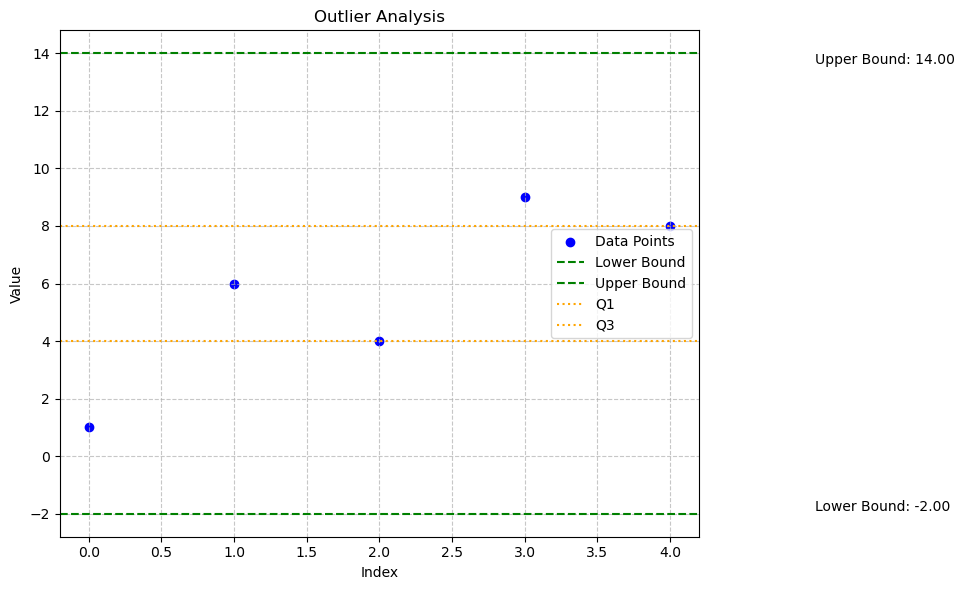

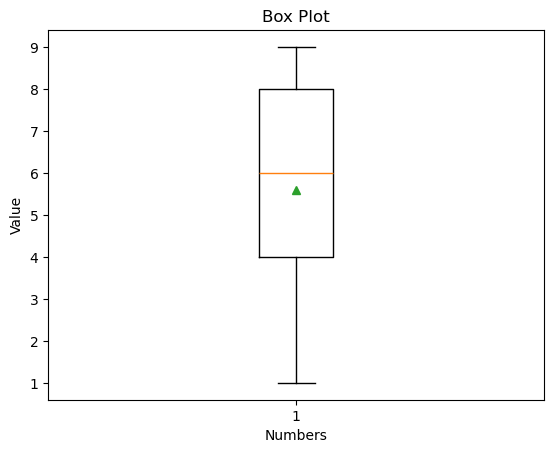

In [20]:
numbers = [1,6,4,9,8];
scale_factor = 1.5;
q1 = np.percentile(numbers, 25);
q3 = np.percentile(numbers, 75);
iqr = q3 - q1; #IQR (Interquartile Range)
lower_bound = q1 - (scale_factor * iqr);
upper_bound = q3 + (scale_factor * iqr);
candidate_outlier = 5;
is_outlier = candidate_outlier < lower_bound or candidate_outlier > upper_bound;

print("Outlier Analysis:")
print("-" * 30)
print(f"Input Numbers:     {sorted(numbers)}")
print(f"Scale Factor:      {scale_factor}")
print("\nStatistical Calculations:")
print(f"Q1 (25th Percentile):  {q1:.2f}")
print(f"Q3 (75th Percentile):  {q3:.2f}")
print(f"IQR:                   {iqr:.2f}")
print(f"Lower Bound:           {lower_bound:.2f}")
print(f"Upper Bound:           {upper_bound:.2f}")
print(f"Candidate Outlier:     {candidate_outlier:.2f}")
print(f"Is Outlier:            {is_outlier}")

visualize_outliers(numbers, scale_factor);
box_plot(numbers);